[Tổng quan về Artificial Neural Network - Viblo](https://viblo.asia/p/tong-quan-ve-artificial-neural-network-1VgZvwYrlAw)

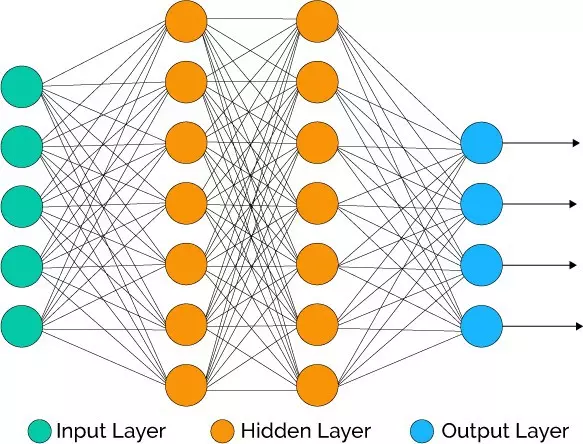

## **Tổng quan về Artificial Neural Network (ANN)**

**1. Artificial Neural Network (ANN) là gì?**
- ANN (Mạng nơ-ron nhân tạo) là mô hình mô phỏng hoạt động của não người.  
- Cấu tạo gồm nhiều **neurons (nút)** liên kết với nhau thành các **lớp**:
  - **Input layer**: Nhận dữ liệu đầu vào.  
  - **Hidden layers**: Xử lý và trích xuất đặc trưng.  
  - **Output layer**: Trả kết quả (phân loại, dự đoán...).  


**2. Forward Propagation (Lan truyền thuận)**
- Là quá trình **tính toán đầu ra từ đầu vào**.  
- Input đi qua các lớp -> nhân với trọng số -> cộng bias -> qua hàm kích hoạt (activation).  
- Kết quả cuối cùng là dự đoán của mô hình.

👉 Ví dụ:  
$$
z = W \cdot x + b \quad \rightarrow \quad a = f(z)
$$


**3. Backward Propagation (Lan truyền ngược)**
- Là quá trình **tính toán gradient (đạo hàm)** của hàm loss theo từng trọng số.  
- Dùng quy tắc **chuỗi (chain rule)** để lan truyền ngược lỗi từ output về input.  
- Mục tiêu: **cập nhật trọng số** bằng thuật toán tối ưu (thường là Gradient Descent).

👉 Công thức cập nhật:  
$$
W_{new} = W_{old} - \eta \cdot \frac{\partial L}{\partial W}
$$

**4. Tóm tắt quy trình huấn luyện ANN**
1. **Forward pass**: Dữ liệu đi qua mạng -> tính đầu ra.  
2. **Tính loss**: So sánh output với ground truth.  
3. **Backward pass**: Tính gradient và lan truyền ngược.  
4. **Update**: Điều chỉnh trọng số để giảm loss.  
5. Lặp lại nhiều epoch cho đến khi mô hình hội tụ.


- **Forward** = dự đoán kết quả.  
- **Backward** = học từ sai số để cải thiện dự đoán.  


**Các thành phần khác**
- **Activation**: tạo phi tuyến (Sigmoid, ReLU, Tanh).  
- **Loss**: đo sai số (MSE, Cross-Entropy).  
- **Optimizer**: cập nhật trọng số (SGD, Adam).  

**Thách thức**
- **Overfitting** → cần Regularization, Dropout.  
- **Vanishing/Exploding Gradient** → cần chọn activation, init, normalization phù hợp.  


## Demo Code - House Price Prediction

[kc_house_data - Kaggle](https://www.kaggle.com/datasets/shivachandel/kc-house-data/code)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivachandel/kc-house-data")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'kc-house-data' dataset.
Path to dataset files: /kaggle/input/kc-house-data


In [2]:
import shutil

# Sao chép folder thay vì di chuyển
shutil.copytree("/kaggle/input/kc-house-data", "/content/kc-house-data")
print("Đã sao chép thư mục tới /content/kc-house-data")

Đã sao chép thư mục tới /content/kc-house-data


In [5]:
# =========================
# 1. Import thư viện
# =========================
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# =========================
# 2. Load dữ liệu
# =========================
data = pd.read_csv('/content/kc-house-data/kc_house_data.csv')
data = data.drop(columns=["id", "date"])
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
data.duplicated().sum()

np.int64(5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [8]:
data.isnull().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0
grade,0


In [9]:
# =========================
# 3. Clean data
# =========================
df_clean = data.replace([np.inf, -np.inf], np.nan)  # bỏ Inf
df_clean = df_clean.drop_duplicates()               # bỏ duplicate
df_clean = df_clean.dropna()                        # bỏ NaN

# Chia X, y
X_all = df_clean.drop(columns=["price"]).select_dtypes(include=[np.number])
y_all = df_clean["price"].values.reshape(-1, 1)

print("X_all shape:", X_all.shape)
print("y_all shape:", y_all.shape)

X_selected = X_all.values
print("Shape X_selected:", X_selected.shape)

X_all shape: (21606, 18)
y_all shape: (21606, 1)
Shape X_selected: (21606, 18)


In [10]:
# =========================
# 4. Train/Val/Test split 80/10/10
# =========================
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_all, y_all, test_size=0.1, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1111, random_state=42
)  # 0.1111*0.9 ≈ 0.1

# In ra để check
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Tỷ lệ phần trăm
n_total = X_all.shape[0]
print(f"Train %: {len(X_train)/n_total*100:.2f}%")
print(f"Val %: {len(X_val)/n_total*100:.2f}%")
print(f"Test %: {len(X_test)/n_total*100:.2f}%")

X_train shape: (17284, 18)
y_train shape: (17284, 1)
X_val shape: (2161, 18)
y_val shape: (2161, 1)
X_test shape: (2161, 18)
y_test shape: (2161, 1)
Train %: 80.00%
Val %: 10.00%
Test %: 10.00%


In [11]:
# =========================
# 5. Chuẩn hóa X + y
# =========================
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit trên train, transform tất cả
X_train = scaler_X.fit_transform(X_train)
X_val   = scaler_X.transform(X_val)
X_test  = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_val   = scaler_y.transform(y_val)
y_test  = scaler_y.transform(y_test)

# In ra để kiểm tra
print("X_train mean/std:", X_train.mean(axis=0)[:5], X_train.std(axis=0)[:5])
print("X_val mean/std:", X_val.mean(axis=0)[:5], X_val.std(axis=0)[:5])
print("X_test mean/std:", X_test.mean(axis=0)[:5], X_test.std(axis=0)[:5])

print("y_train mean/std:", y_train.mean(), y_train.std())
print("y_val mean/std:", y_val.mean(), y_val.std())
print("y_test mean/std:", y_test.mean(), y_test.std())

X_train mean/std: [ 1.20040777e-16  1.12024355e-17 -1.94244065e-16  1.43884493e-17
 -2.25282006e-16] [1. 1. 1. 1. 1.]
X_val mean/std: [-0.02489758 -0.02153622  0.00227397  0.01140316 -0.01007593] [1.00027374 1.0158034  1.03063939 0.96896697 0.98414886]
X_test mean/std: [ 0.02292804  0.00495006  0.00815964 -0.02616781 -0.04462616] [1.20669885 1.00309078 1.02796557 0.89414119 0.96788739]
y_train mean/std: -8.406965370454784e-17 1.0
y_val mean/std: 0.010986550777450475 1.1329314077888377
y_test mean/std: 0.03378518521016214 1.1335619081015977


In [12]:
# =========================
# 6. Dataset & DataLoader
# =========================
import torch
from torch.utils.data import Dataset, DataLoader

class HouseDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

batch_size = 32
train_loader = DataLoader(HouseDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(HouseDataset(X_val, y_val), batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(HouseDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

# In ra kiểm tra
print(f"Train batches: {len(train_loader)}, samples: {len(train_loader.dataset)}")
print(f"Val batches:   {len(val_loader)}, samples: {len(val_loader.dataset)}")
print(f"Test batches:  {len(test_loader)}, samples: {len(test_loader.dataset)}")

# In shape batch đầu tiên
x_batch, y_batch = next(iter(train_loader))
print("Shape X batch:", x_batch.shape)
print("Shape y batch:", y_batch.shape)

Train batches: 541, samples: 17284
Val batches:   68, samples: 2161
Test batches:  68, samples: 2161
Shape X batch: torch.Size([32, 18])
Shape y batch: torch.Size([32, 1])


In [13]:
# =========================
# 7. ANN model: 4 hidden layers
# =========================
import torch.nn as nn
import torch

class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.net(x)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Khởi tạo model
model = ANNModel(input_dim=X_train.shape[1]).to(device)

# Loss, optimizer, scheduler
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# In ra kiểm tra
print(model)
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total params: {total_params}, Trainable params: {trainable_params}")

ANNModel(
  (net): Sequential(
    (0): Linear(in_features=18, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)
Total params: 182273, Trainable params: 182273


In [14]:
# =========================
# 8. Train loop + Early Stopping
# =========================
max_epochs = 50
patience = 10
best_val_loss = float("inf")
counter = 0

train_losses, val_losses = [], []

for epoch in range(max_epochs):
    # ---- Train ----
    model.train()
    epoch_train_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        epoch_train_loss += loss.item()
    epoch_train_loss /= len(train_loader)

    # ---- Validation ----
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            epoch_val_loss += criterion(preds, yb).item()
    epoch_val_loss /= len(val_loader)

    # ---- Scheduler ----
    scheduler.step(epoch_val_loss)

    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1:02d}: Train Loss={epoch_train_loss:.4f}, Val Loss={epoch_val_loss:.4f}")

    # ---- Early Stopping ----
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        best_model_state = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered!")
            break

# Load model tốt nhất
model.load_state_dict(best_model_state)
print(f"Best validation loss: {best_val_loss:.4f}")

Epoch 01: Train Loss=0.2330, Val Loss=0.1715
Epoch 02: Train Loss=0.1564, Val Loss=0.2234
Epoch 03: Train Loss=0.1375, Val Loss=0.1508
Epoch 04: Train Loss=0.1288, Val Loss=0.2580
Epoch 05: Train Loss=0.1187, Val Loss=0.2140
Epoch 06: Train Loss=0.1138, Val Loss=0.1391
Epoch 07: Train Loss=0.1131, Val Loss=0.1439
Epoch 08: Train Loss=0.1078, Val Loss=0.1757
Epoch 09: Train Loss=0.1017, Val Loss=0.1683
Epoch 10: Train Loss=0.1023, Val Loss=0.1770
Epoch 11: Train Loss=0.0890, Val Loss=0.1301
Epoch 12: Train Loss=0.0838, Val Loss=0.1406
Epoch 13: Train Loss=0.0814, Val Loss=0.1428
Epoch 14: Train Loss=0.0771, Val Loss=0.1299
Epoch 15: Train Loss=0.0771, Val Loss=0.1339
Epoch 16: Train Loss=0.0760, Val Loss=0.1650
Epoch 17: Train Loss=0.0739, Val Loss=0.1256
Epoch 18: Train Loss=0.0710, Val Loss=0.1419
Epoch 19: Train Loss=0.0708, Val Loss=0.1466
Epoch 20: Train Loss=0.0718, Val Loss=0.1549
Epoch 21: Train Loss=0.0678, Val Loss=0.1468
Epoch 22: Train Loss=0.0612, Val Loss=0.1432
Epoch 23: 

In [15]:
# =========================
# 9. Evaluation trên test set
# =========================
model.eval()
y_pred_list, y_true_list = [], []

with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model(xb)
        y_pred_list.append(preds.cpu().numpy())
        y_true_list.append(yb.cpu().numpy())

# Chuyển về mảng numpy 2D
y_pred = np.vstack(y_pred_list)
y_true = np.vstack(y_true_list)

# In ra shape để check
print("y_pred shape:", y_pred.shape)
print("y_true shape:", y_true.shape)

# Inverse transform về giá trị gốc
y_pred = scaler_y.inverse_transform(y_pred)
y_true = scaler_y.inverse_transform(y_true)

# Tính metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"\nTest MAE: {mae:.2f} USD")
print(f"Test RMSE: {rmse:.2f} USD")
print(f"Test R²: {r2:.4f}")

y_pred shape: (2161, 1)
y_true shape: (2161, 1)

Test MAE: 68304.22 USD
Test RMSE: 131481.92 USD
Test R²: 0.8945


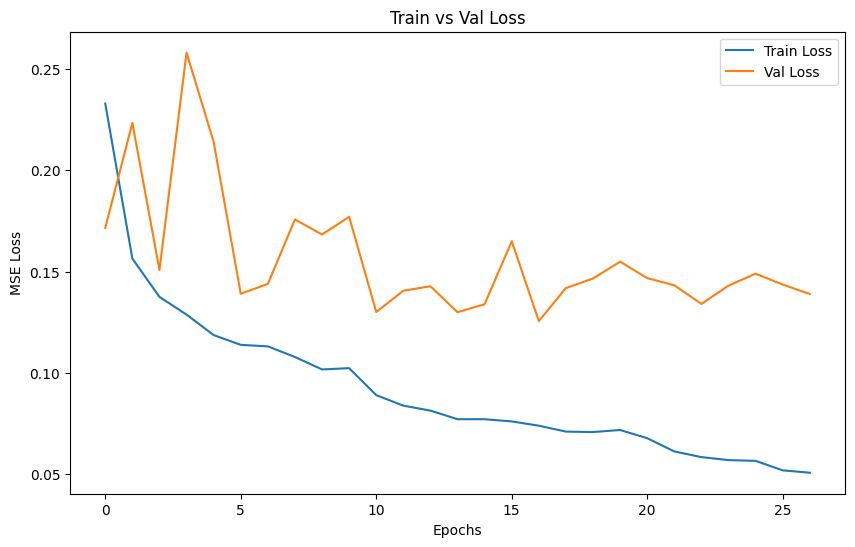

In [16]:
# =========================
# 10. Plot train/val loss
# =========================
plt.figure(figsize=(10,6))
plt.plot(train_losses,label="Train Loss")
plt.plot(val_losses,label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Train vs Val Loss")
plt.legend()
plt.show()

In [17]:
# =========================
# 11. Inference
# =========================
print("\n=== Inference ===")
model.eval()
with torch.no_grad():
    for i in range(20):
        x_sample = torch.tensor(X_test[i], dtype=torch.float32).unsqueeze(0).to(device)
        # Dự đoán
        y_pred_scaled = model(x_sample).cpu().numpy()
        y_pred_val = scaler_y.inverse_transform(y_pred_scaled)[0][0]
        # Giá trị thật
        y_true_val = y_true[i][0]
        print(f"Case {i+1}: True={y_true_val:.0f} USD, Pred={y_pred_val:.0f} USD")


=== Inference ===
Case 1: True=529950 USD, Pred=563059 USD
Case 2: True=540000 USD, Pred=839070 USD
Case 3: True=640000 USD, Pred=619428 USD
Case 4: True=770000 USD, Pred=903919 USD
Case 5: True=445000 USD, Pred=515633 USD
Case 6: True=585000 USD, Pred=625233 USD
Case 7: True=600000 USD, Pred=628486 USD
Case 8: True=575000 USD, Pred=578118 USD
Case 9: True=270000 USD, Pred=329168 USD
Case 10: True=385000 USD, Pred=430087 USD
Case 11: True=299950 USD, Pred=298848 USD
Case 12: True=250750 USD, Pred=286168 USD
Case 13: True=620000 USD, Pred=692448 USD
Case 14: True=240000 USD, Pred=227151 USD
Case 15: True=529000 USD, Pred=541325 USD
Case 16: True=211000 USD, Pred=278510 USD
Case 17: True=255500 USD, Pred=295332 USD
Case 18: True=535000 USD, Pred=611352 USD
Case 19: True=800000 USD, Pred=1015885 USD
Case 20: True=255000 USD, Pred=264470 USD
